In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'


In [11]:
df = pd.read_csv(path)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'

In [ ]:
print(df.head())
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df.drop(['mmsi'], axis=1, inplace=True)
print(df.head())

           mmsi  mean_speed  sd_speed  mean_course   sd_course  mean_dis_port  \
0  1.252340e+12    2.832586  4.649472   182.270427  118.752408   44072.984259   
1  5.145483e+12    1.249238  2.214813   220.598183  104.977158   78241.626524   
2  1.985955e+13    0.744803  2.029596   234.488085   86.170132   21762.805725   
3  3.491170e+13    1.538317  2.506843   146.193885  124.886371   60672.921862   
4  5.110130e+13    2.103552  2.662536   212.084623  101.589559   44856.501803   

   mean_dis_shore  area_covered  log_dis_shore  log_speed  log_dis_port  \
0    31216.217811    158.569940      -4.240884  -7.969092     -1.127925   
1    68632.563233     12.735326      -3.721242  -7.030998      9.336561   
2     2575.576851      0.141141      -9.169449 -10.490752      7.251667   
3    31330.991469      2.075710      -4.446348  -7.687318     10.099510   
4    11129.255970      5.257880      -2.348613  -6.106761      9.691107   

   mul_log_dis_shore_speed  mul_log_dis_port_speed  mul_dis_sh

In [ ]:
# check for missing values in variables

df.isnull().sum()

mean_speed                 0
sd_speed                   0
mean_course                0
sd_course                  0
mean_dis_port              0
mean_dis_shore             0
area_covered               0
log_dis_shore              0
log_speed                  0
log_dis_port               0
mul_log_dis_shore_speed    0
mul_log_dis_port_speed     0
mul_dis_shore_speed        0
unique_id                  0
dtype: int64

In [ ]:
#  Multi Output Classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['mean_speed', 'sd_speed', 'mean_course', 'sd_course' , 'mean_dis_port' , 'mean_dis_shore', 'area_covered' , 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed', 'mul_log_dis_port_speed', 'mul_dis_shore_speed' ]], df['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
# print(y_train)
# print(X_train)
# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)


ClassifierChain(base_estimator=LogisticRegression(), order='random',
                random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss)


Accuracy: 0.5434782608695652
Hamming Loss: 0.45652173913043476


In [ ]:
# Training the model using PCA csv
from sklearn.metrics import hamming_loss
# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_pca.csv'

# Read the csv file
df_pca = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_pca[['PC1', 'PC2', 'PC3' ]], df_pca['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)


Accuracy: 0.6304347826086957
Hamming Loss: 0.3695652173913043


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the PCA data from the CSV file
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')

# Separate the features and the target variable
X = df_pca[['PC1', 'PC2', 'PC3']].values
y = df_pca['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Initialize the PCA model
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Initialize the SVM classifier
svm = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Transform the test set using PCA
X_test_pca = pca.transform(X_test)

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


Best Model Accuracy: 0.6521739130434783
Best Model Hyperparameters: {'C': 10, 'kernel': 'linear'}


Accuracy: 0.6739130434782609
Hamming Loss: 0.32608695652173914


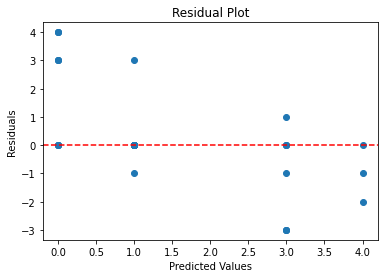

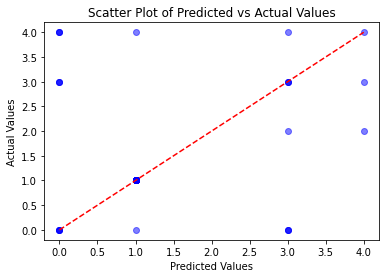

In [ ]:
# Training the model using LDA csv

# Import Dataset
import matplotlib.pyplot as plt
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_lda.csv'

# Read the csv file
df_lda = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_lda[['LDA1', 'LDA2', 'LDA3' ]], df_lda['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Create a scatter plot of predicted vs actual values
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test),
         max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the LDA data from the CSV file
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')

# Separate the features and the target variable
X = df_lda[['LDA1', 'LDA2', 'LDA3']].values
y = df_lda['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# Initialize the LDA model
model = LinearDiscriminantAnalysis()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Best Model Accuracy: 0.6739130434782609
Best Model Hyperparameters: {'solver': 'lsqr'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6956521739130435


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machines (SVM) model
model = SVC()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


Best Model Accuracy: 0.6956521739130435
Best Model Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
# Facing issues with the below code, will try to fix it later.
# The main problem with this code is that the library auto-sklearn, is not up to date and therefore it is not working.

import autosklearn.classification as asc
from sklearn.model_selection import train_test_split

path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv'

#  Read the csv file

df_stiched = pd.read_csv(path)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_stiched.drop('unique_id', axis=1),
                                                    df_stiched['unique_id'],
                                                    test_size=0.2,
                                                    random_state=42)

# Creating an AutoSklearnClassifier
automl_classifier = asc.AutoSklearnClassifier(time_left_for_this_task=3600,  # Maximum time in seconds for fitting the models
                                              per_run_time_limit=360,  # Maximum time in seconds for a single model
                                              n_jobs=1,  # Number of parallel processes
                                              ensemble_size=4,  # Number of models in the ensemble
                                              ensemble_nbest=4,  # Number of best models to use in the ensemble
                                              seed=42,
                                              memory_limit=8192)  # Random seed for reproducibility

# Training the AutoSklearnClassifier
automl_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = automl_classifier.predict(X_test)

# Evaluating the accuracy
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


[ERROR] [2023-05-17 03:03:18,878:Client-AutoML(42):45963bb0-f431-11ed-af79-6e27087b6471] (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/vitthal/miniforge3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)
[ERROR] [20

ValueError: (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/vitthal/miniforge3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load the data from CSV files
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Combine the features from all CSV files
X = pd.concat([df_pca[['PC1', 'PC2', 'PC3']], df_lda[['LDA1', 'LDA2', 'LDA3']], df_ica[['ICA1', 'ICA2', 'ICA3']]], axis=1)

# Add the target variable (unique_id)
y = df_pca['unique_id']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
j48_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()

# Create the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model),
    ('j48', j48_model),
    ('mlp', mlp_model)
], voting='hard')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'j48__max_depth': [None, 5, 10],
    'mlp__hidden_layer_sizes': [(100,), (200,), (300,)],
    'mlp__activation': ['relu', 'tanh']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ensemble_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Make predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y, y_pred)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", grid_search.best_params_)


In [ ]:
# # Convert boolean values to numeric (0 for 'false', 1 for 'True')
# le = LabelEncoder()
# df[''] = le.fit_transform(df['defects'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('geartype', axis=1), df['geartype'], test_size=0.2, random_state=42)

# Train an SVM classifier with OneVsRestClassifier for multi-label classification
clf = OneVsRestClassifier(SVC(kernel='linear'))
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


In [ ]:
# Print the classification report and accuracy score
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


In [ ]:
X = df.drop(['speed'], axis=1)

y = df['geartype']

In [ ]:
# split X and y into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((189, 5), (48, 5))

Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,Unnamed: 0.1,Unnamed: 0,mmsi,geartype,area
count,1.890000e+02,189.0,1.890000e+02,1.890000e+02,1.890000e+02
mean,-1.104349e-16,0.0,2.702130e-17,-6.461615e-18,-2.643388e-18
std,1.002656e+00,0.0,1.002656e+00,1.002656e+00,1.002656e+00
min,-1.710529e+00,0.0,-1.582126e+00,-2.733576e+00,-2.041320e-01
25%,-8.662780e-01,0.0,-8.659454e-01,-2.133523e-01,-2.040382e-01
50%,-7.470570e-03,0.0,-1.288527e-01,-2.133523e-01,-2.021169e-01
75%,8.658929e-01,0.0,8.675692e-01,6.267224e-01,-1.684021e-01
max,1.710144e+00,0.0,1.794583e+00,1.466797e+00,9.350985e+00


run svm with default hyperparameters

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn import preprocessing

labenc = preprocessing.LabelEncoder()
encoded = labenc.fit_transform(y_train)


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,encoded)


# make predictions on test set
y_pred=svc.predict(X_test)

# print(y_test,y_pred)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9375


In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

# print(X_test,y_pred)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with rbf kernel and C=100.0 : 0.9583


In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 1.0000


In [ ]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([3., 4., 5., 3., 3., 2., 3., 3., 4., 4., 3., 5., 5., 3., 5., 3., 2.,
       3., 3., 0., 3., 3., 3., 3., 3., 2., 3., 5., 5., 2., 1., 0., 3., 2.,
       2., 5., 3., 3., 3., 3., 2., 4., 3., 3., 5., 3., 3., 3., 4., 3., 3.,
       3., 5., 5., 4., 2., 2., 2., 3., 5., 2., 3., 2., 4., 5., 3., 5., 3.,
       3., 0., 3., 3., 5., 2., 5., 1., 3., 3., 5., 5., 3., 4., 3., 3., 3.,
       5., 3., 0., 3., 3., 3., 2., 2., 3., 5., 3., 2., 3., 3., 3., 3., 5.,
       5., 1., 3., 3., 3., 5., 4., 5., 5., 4., 3., 5., 1., 3., 3., 2., 3.,
       3., 0., 3., 5., 2., 3., 3., 5., 2., 2., 3., 3., 4., 4., 3., 2., 2.,
       4., 3., 4., 3., 2., 5., 3., 4., 5., 5., 2., 4., 3., 5., 3., 2., 4.,
       3., 3., 5., 4., 3., 5., 3., 3., 5., 3., 3., 2., 4., 3., 5., 4., 5.,
       2., 5., 3., 3., 3., 5., 3., 3., 2., 2., 5., 1., 3., 5., 3., 5., 3.,
       2., 4.])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


In [ ]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8750


In [ ]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9167


In [ ]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8125


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion matrix

 [[ 4  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  0  8]]

True Positives(TP) =  4

True Negatives(TN) =  6

False Positives(FP) =  0

False Negatives(FN) =  0


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         4
         2.0       1.00      1.00      1.00         6
         3.0       1.00      1.00      1.00        23
         4.0       1.00      1.00      1.00         7
         5.0       1.00      1.00      1.00         8

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 1.0000


Classification error

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


Sensitivity

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


ROC-AUC Curves

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ValueError: ignored

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(linear_svc, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : nan


Stratfied K-Fold Cross Validation With shuffle split

In [ ]:
from sklearn.model_selection import KFold


kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [ ]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

In [ ]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

In [ ]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

In [ ]:
# print cross-validation scores with rbf kernel

print('Stratified Cross-validation scores with rbf kernel:\n\n{}'.format(rbf_scores))


In [ ]:
# print average cross-validation score with rbf kernel

print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

HyperParameter Optimization using GridSearch CV


In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


In [ ]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))